Nama: Choirunnisa Isma Fathinah
NIM: 4101422118
Prodi: Pendidikan Matematika

In [19]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
#pemanggilan data
df = pd.read_csv("produk_elektronik.csv")

In [21]:
# 1b. Tampilkan informasi dataset
print("Informasi Dataset:")
print(df.info())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   produk_id      550 non-null    int64  
 1   nama_produk    550 non-null    object 
 2   kategori       550 non-null    object 
 3   harga          520 non-null    float64
 4   rating         500 non-null    float64
 5   jumlah_ulasan  530 non-null    float64
 6   negara_asal    550 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 30.2+ KB
None


In [22]:
# 2a. Cek missing values
print("\nJumlah Missing Values per Kolom:")
print(df.isnull().sum())


Jumlah Missing Values per Kolom:
produk_id         0
nama_produk       0
kategori          0
harga            30
rating           50
jumlah_ulasan    20
negara_asal       0
dtype: int64


2b. Penjelasan mengenai missing values
Missing values dapat mempengaruhi analisis karena dapat menyebabkan bias, mengurangi akurasi model, dan membuat interpretasi menjadi tidak valid.

In [24]:
# 2c. Pilih metode untuk menangani missing values
# Untuk kolom numerik bisa mengganti dengan mean, dan untuk kategori dengan modus
df.fillna(df.mean(numeric_only=True), inplace=True)  # Untuk kolom numerik
df.fillna(df.mode().iloc[0], inplace=True)  # Untuk kolom kategori

In [25]:
# 2d. Tampilan jumlah missing values setelah ditangani
print("\nJumlah Missing Values setelah penanganan:")
print(df.isnull().sum())


Jumlah Missing Values setelah penanganan:
produk_id        0
nama_produk      0
kategori         0
harga            0
rating           0
jumlah_ulasan    0
negara_asal      0
dtype: int64


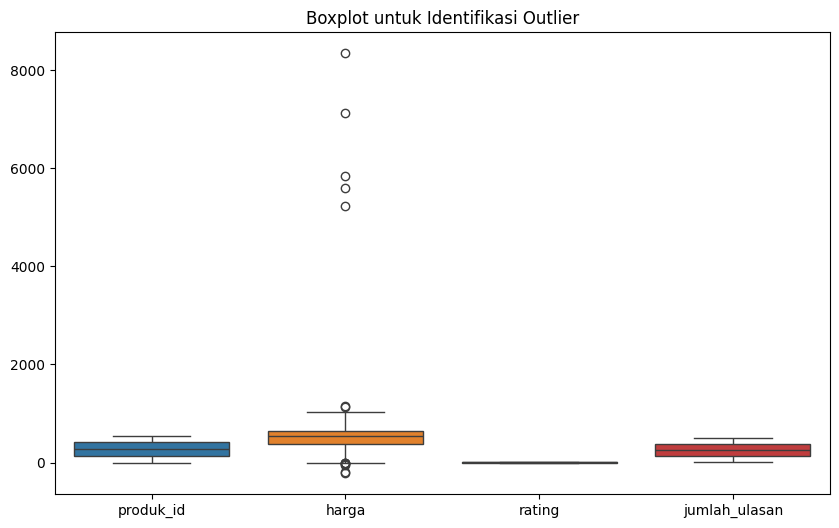

In [26]:
# 3a. Identifikasi outlier menggunakan boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.title("Boxplot untuk Identifikasi Outlier")
plt.show()

3b. Dampak outlier terhadap analisis
Outlier dapat menyebabkan model menjadi bias, meningkatkan variabilitas, dan mengurangi generalisasi.

3c. Metode yang dipilih adalah IQR (Interquartile Range) karena lebih efektif terhadap outlier, sehingga memastikan outlier dihapus tanpa mengganggu struktur utama data.

In [47]:
# 3d. Langkah 1: Pilih hanya kolom numerik
numerical_cols = df.select_dtypes(include=['number']).columns

In [40]:
# Memastikan tidak ada missing values sebelum menangani outlier
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

In [41]:
# Hitung Q1, Q3, dan IQR
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

In [42]:
# Mask untuk kolom numerik
mask = (df[numerical_cols] >= (Q1 - 1.5 * IQR)) & (df[numerical_cols] <= (Q3 + 1.5 * IQR))

In [43]:
# Mask ke data set
df_outlier_removed = df[mask.all(axis=1)]

In [44]:
# Menegecek jumlah data sebelum dan sesudah
print("\nJumlah data sebelum outlier ditangani:", df.shape[0])
print("Jumlah data setelah outlier ditangani:", df_outlier_removed.shape[0])


Jumlah data sebelum outlier ditangani: 550
Jumlah data setelah outlier ditangani: 536


In [49]:
# 4a. Tentukan kolom yang memerlukan encoding
categorical_columns = df_outlier_removed.select_dtypes(include=['object']).columns
print("\nKolom Kategorikal yang Memerlukan Encoding:", list(categorical_columns))


Kolom Kategorikal yang Memerlukan Encoding: ['nama_produk', 'kategori', 'negara_asal']


In [50]:
# 4b. Bandingkan metode encoding
# Gunakan One-Hot Encoding untuk kategori nominal dan Label Encoding untuk ordinal jika ada
df_encoded = pd.get_dummies(df_outlier_removed, columns=categorical_columns)

print("\nDataset setelah Encoding:")
print(df_encoded.head())


Dataset setelah Encoding:
   produk_id  harga  rating  jumlah_ulasan  nama_produk_Produk_1  \
0          1  746.0     4.2          273.0                  True   
1          2  241.0     3.5          239.0                 False   
2          3  810.0     3.8          209.0                 False   
3          4  303.0     3.2           59.0                 False   
4          5  252.0     3.7           76.0                 False   

   nama_produk_Produk_10  nama_produk_Produk_100  nama_produk_Produk_101  \
0                  False                   False                   False   
1                  False                   False                   False   
2                  False                   False                   False   
3                  False                   False                   False   
4                  False                   False                   False   

   nama_produk_Produk_102  nama_produk_Produk_103  ...  kategori_Tablet  \
0                   False       